# 인공 신경망

패션 MNIST

In [1]:
import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


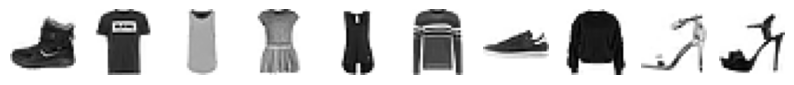

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [6]:
print(train_target[:10])

[9 0 0 3 0 2 7 2 5 5]


In [7]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


로지스틱 회귀로 패션 아이템 분류하기

In [9]:
train_scaled = train_input/255.0
#패션 MNIST의 경우 각 픽셀은 0~255 사이의 정숫값을 가지므로, 255로 나누어 0~1사이의 값으로 정규화.
train_scaled = train_scaled.reshape(-1, 28*28)

In [10]:
print(train_scaled.shape)

(60000, 784)


In [11]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8194166666666666


In [12]:
classes = np.unique(train_target)
train_score = []
for i in range (100):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))

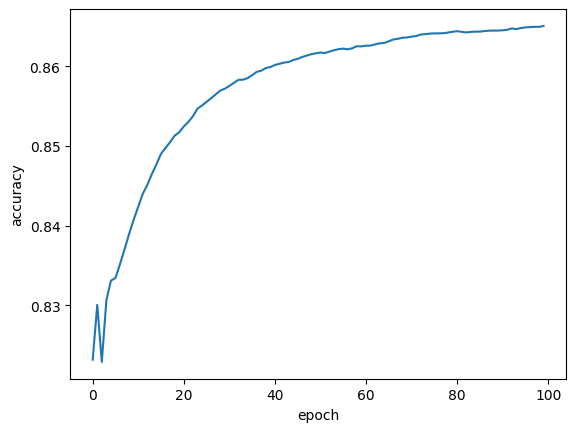

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

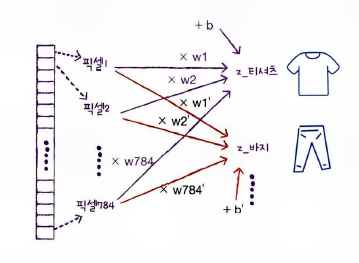

인공신경망 Artificial Neural Network(ANN)

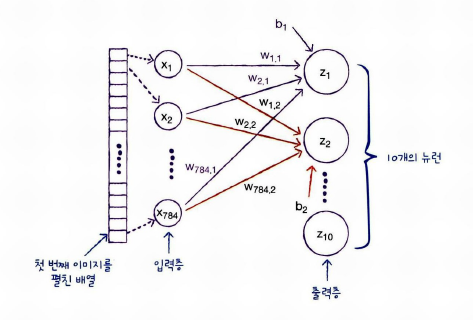

텐서플로(tensorflow)와 케라스(keras)
- tensorflow: 구글이 오픈소스로 공개한 딥러닝 라이브러리
- keras: tensorflow의 고수준 API(application programming interface), 딥러닝 라이브러리, 직접 GPU 연산을 수행하지 않고, GPU 연산을 수행하는 다른 라이브러리(tensorflow 등)를 backend로 사용.

딥러닝 라이브러리는 그래픽 처리 장치인 GPU를 사용하여 ANN을 훈련함. GPU는 벡터와 행렬 연산에 매우 최적화되어 있기 때문에 곱셈과 덧셈이 많이 수행되는 인공 신경망에 큰 도움이 된다.

In [13]:
import tensorflow as tf

In [ ]:
import keras

In [ ]:
keras.config.backend()

'tensorflow'

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "torch"

인공 신경망으로 모델 만들기
- 로지스틱 회귀에서는 교차 검증을 사용해 모델을 평가했지만, 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내여 사용한다. 이유는 다음과 같다.
1) 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적이다.
2) 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸린다.

In [14]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [15]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [16]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


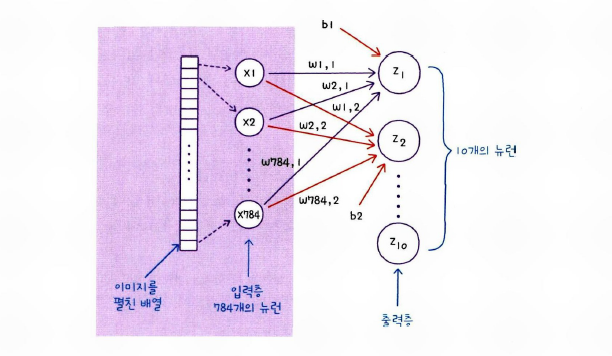

In [17]:
inputs = keras.layers.Input(shape=(784,))

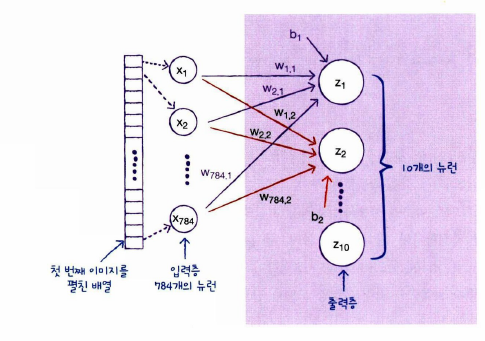

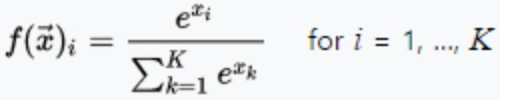

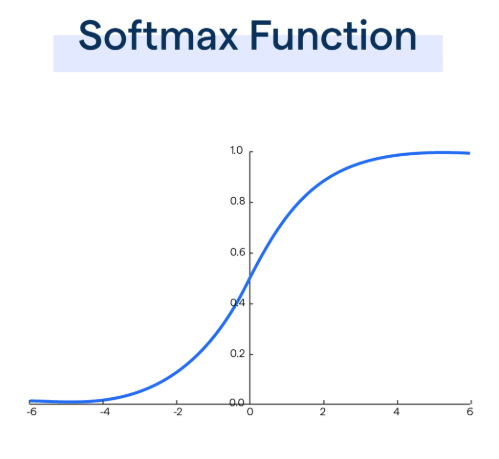

In [19]:
dense = keras.layers.Dense(10, activation='softmax')

In [20]:
model = keras.Sequential([inputs, dense])

인공 신경망으로 패션 아이템 분류하기

In [21]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

손실함수의 분류(keras 기준)
- 이진 분류 : loss = 'binary_crossentropy'(sigmoid 함수의 출력값을 사용해 계산.)
- 다중 분류 : loss = 'categorical_crossentropy'(one-hot encoding)

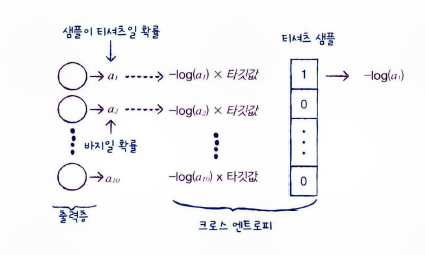

In [23]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


'sparse_categorical_crossentropy': 정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산.

In [24]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7362 - loss: 0.7861
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8377 - loss: 0.4813
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8438 - loss: 0.4554
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8519 - loss: 0.4326
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8508 - loss: 0.4422


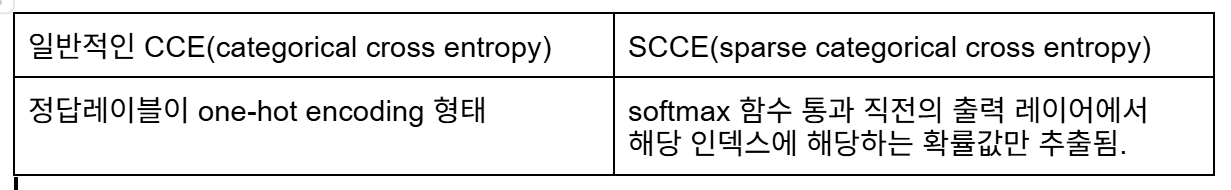

In [25]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8434 - loss: 0.4502


[0.4572804868221283, 0.8431666493415833]